# Défi Grosses Data 2018

## Data analysis

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
from os import listdir

In [28]:
def open_and_transform(file):
    path='./../data_meteo/'
    df = pd.read_csv(path+file, header=0, delimiter=";",decimal=",")
    df['date']=df['date'].apply(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
    df['insee'] = df['insee'].astype('category')
    df['mois'] = df['mois'].astype('category')
    df['ddH10_rose4'] = df['ddH10_rose4'].astype('category')
    df['ech'] = df['ech'].astype('category')
    df['flvis1SOL0'] = df['flvis1SOL0'].astype('float64')
    return df

In [29]:
listdir('./../data_meteo/')
list_files=np.empty(36, dtype='|U12')
i=0
for fichier in listdir('./../data_meteo/'):
    if 'train' in fichier:
        list_files[i]=fichier
        i=i+1

In [30]:
df_tot=pd.DataFrame()
for file in list_files:
    df_tot=pd.concat([df_tot,open_and_transform(file)])

In [31]:
df_tot=df_tot.sort_values(by=['ech','date'],ascending=True)

In [32]:
df_tot.describe()

,tH2_obs,capeinsSOL0,ciwcH20,clwcH20,ffH10,flir1SOL0,fllat1SOL0,flsen1SOL0,flvis1SOL0,hcoulimSOL0,...,rrH20,tH2,tH2_VGrad_2.100,tH2_XGrad,tH2_YGrad,tpwHPA850,ux1H10,vapcSOL0,vx1H10,ech
count,189260.000000,170492.000000,1.883070e+05,184800.000000,184702.000000,188118.000000,1.882190e+05,1.881510e+05,1.881810e+05,188307.000000,...,184793.000000,184723.000000,184716.000000,184723.000000,184723.000000,188258.000000,184702.000000,188286.000000,184716.000000,189280.000000
mean,12.006981,59.169631,5.027560e-08,0.000006,3.406578,-217648.413598,-1.476294e+05,-7.151363e+04,4.136244e+05,490.318652,...,0.003668,12.143805,-0.183838,0.001031,0.000351,9.477384,1.128499,17.538598,0.732079,16.898669
std,6.263605,142.986766,1.058130e-06,0.000035,2.069121,133170.495298,2.338682e+05,2.379013e+05,6.915170e+05,505.990997,...,0.022547,6.495621,1.890783,0.002268,0.003244,4.502674,4.963149,7.752743,4.872846,9.548489
min,-7.900000,0.000000,0.000000e+00,0.000000,0.008230,-816882.554121,-1.780445e+06,-1.889882e+06,0.000000e+00,0.096693,...,0.000000,-9.776349,-9.275321,-0.022873,-0.021223,-3.477451,-22.470358,1.305881,-20.111824,1.000000
25%,7.600000,0.124246,0.000000e+00,0.000000,1.924383,-302011.786091,-1.970599e+05,-8.946848e+04,0.000000e+00,117.687765,...,0.000000,7.527034,-1.271802,-0.000110,-0.000649,6.218264,-2.001309,11.556538,-2.746925,9.000000
50%,11.600000,5.425625,0.000000e+00,0.000000,2.990316,-222379.297816,-4.894289e+04,-1.954219e+03,3.600000e-12,321.587923,...,0.000000,11.855420,-0.588375,0.000741,0.000304,9.426134,0.850176,16.337755,0.501839,17.000000
75%,16.100000,47.025052,0.000000e+00,0.000000,4.438814,-107138.680673,-2.580780e+02,4.394024e+04,5.918494e+05,709.740217,...,0.000000,16.400056,0.554582,0.001957,0.001603,12.702356,3.981172,22.293404,4.015721,25.000000
max,38.400002,2448.672118,6.457207e-05,0.000447,17.449989,78624.299681,1.857474e+05,6.836656e+05,3.206372e+06,5289.707727,...,1.754839,39.642168,11.714195,0.028023,0.031406,22.606778,29.156881,54.592355,26.574025,36.000000


In [33]:
df_tot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189280 entries, 0 to 2134
Data columns (total 31 columns):
date               189280 non-null datetime64[ns]
insee              189280 non-null category
tH2_obs            189260 non-null float64
capeinsSOL0        170492 non-null float64
ciwcH20            188307 non-null float64
clwcH20            184800 non-null float64
ddH10_rose4        184702 non-null category
ffH10              184702 non-null float64
flir1SOL0          188118 non-null float64
fllat1SOL0         188219 non-null float64
flsen1SOL0         188151 non-null float64
flvis1SOL0         188181 non-null float64
hcoulimSOL0        188307 non-null float64
huH2               184723 non-null float64
iwcSOL0            188307 non-null float64
nbSOL0_HMoy        188293 non-null float64
nH20               178493 non-null float64
ntSOL0_HMoy        188293 non-null float64
pMER0              184471 non-null float64
rr1SOL0            188265 non-null float64
rrH20              184

In [34]:
np.shape(df_tot)

(189280, 31)

In [35]:
type(df_tot)

pandas.core.frame.DataFrame

In [36]:
N_withNA=df_tot.shape[0]
N_withNA

189280

In [51]:
df_clean=df_tot.dropna(axis=0)
N_withoutNA=df_clean.shape[0]
print("Nous avons éliminé %d données soit %0.2f %s"%(N_withNA-N_withoutNA,(N_withNA-N_withoutNA)/N_withNA*100,'%'))

Nous avons éliminé 26528 données soit 14.02 %


In [56]:
## remplacer les mois par des int
df_dummies=pd.get_dummies(df_clean[['mois']])
df_clean_c=pd.concat([df_clean,df_dummies],axis=1)
df_clean_c=df_clean_c.drop(['mois'],axis=1)

df_dummies=pd.get_dummies(df_clean_c[['insee']])
df_clean_c=pd.concat([df_clean_c,df_dummies],axis=1)
df_clean_c=df_clean_c.drop(['insee'],axis=1)

df_dummies=pd.get_dummies(df_clean_c[['ddH10_rose4']])
df_clean_c=pd.concat([df_clean_c,df_dummies],axis=1)
df_clean_c=df_clean_c.drop(['ddH10_rose4'],axis=1)

In [57]:
from sklearn.model_selection import train_test_split  
Y=df_clean_c['tH2_obs']
X=df_clean_c
X=X.drop(['tH2_obs'],axis=1)
X=X.drop(['date'],axis=1)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=11)

## Modèle Linéaire et sélection de variables / Lasso style

In [71]:
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV

In [79]:
reg=linear_model.Lasso()
model=reg.fit(X_train,Y_train)
#X.columns

In [80]:
prev=reg.predict(X_test)
print("MSE =",mean_squared_error(Y_test,prev))
print("R2 =",r2_score(Y_test,prev))

MSE = 1.8082717877
R2 = 0.953939650649


In [81]:
# grille de valeurs du paramètre alpha à optimiser
param=[{"alpha":[0.05,0.1,0.2,0.3,0.4,0.5,1]}]
regLasso = GridSearchCV(linear_model.Lasso(), param,cv=5,n_jobs=-1)
regLassOpt=regLasso.fit(X_train, Y_train)
# paramètre optimal
regLassOpt.best_params_["alpha"]
print("Meilleur R2 = %f, Meilleur paramètre = %s" % (regLassOpt.best_score_,regLassOpt.best_params_))

Meilleur R2 = 0.957471, Meilleur paramètre = {'alpha': 0.05}


Prévision avec la valeur optimale de alpha :

In [82]:
prev=regLassOpt.predict(X_test)
print("MSE =",mean_squared_error(prev,Y_test))
print("R2 =",r2_score(Y_test,prev))

MSE = 1.62901984203
R2 = 0.958505561203


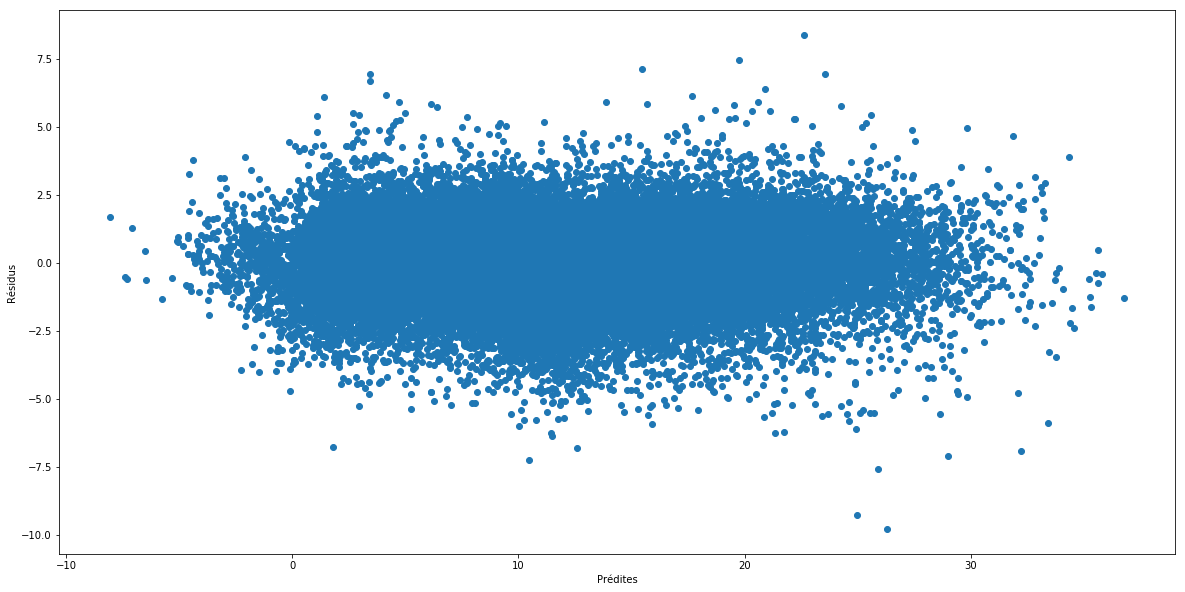

In [83]:
plt.figure(figsize=(20,10))
plt.plot(prev,Y_test-prev,"o")
plt.xlabel(u"Prédites")
plt.ylabel(u"Résidus")
plt.show()

In [84]:
regLasso=linear_model.Lasso(alpha=regLassOpt.best_params_['alpha'])
model_lasso=regLasso.fit(X_train,Y_train)
model_lasso.coef_
coef = pd.Series(model.coef_, index = X_train.columns)
print("Lasso conserve " + str(sum(coef != 0)) + 
      " variables et en supprime " +  str(sum(coef == 0)))

Lasso conserve 8 variables et en supprime 41


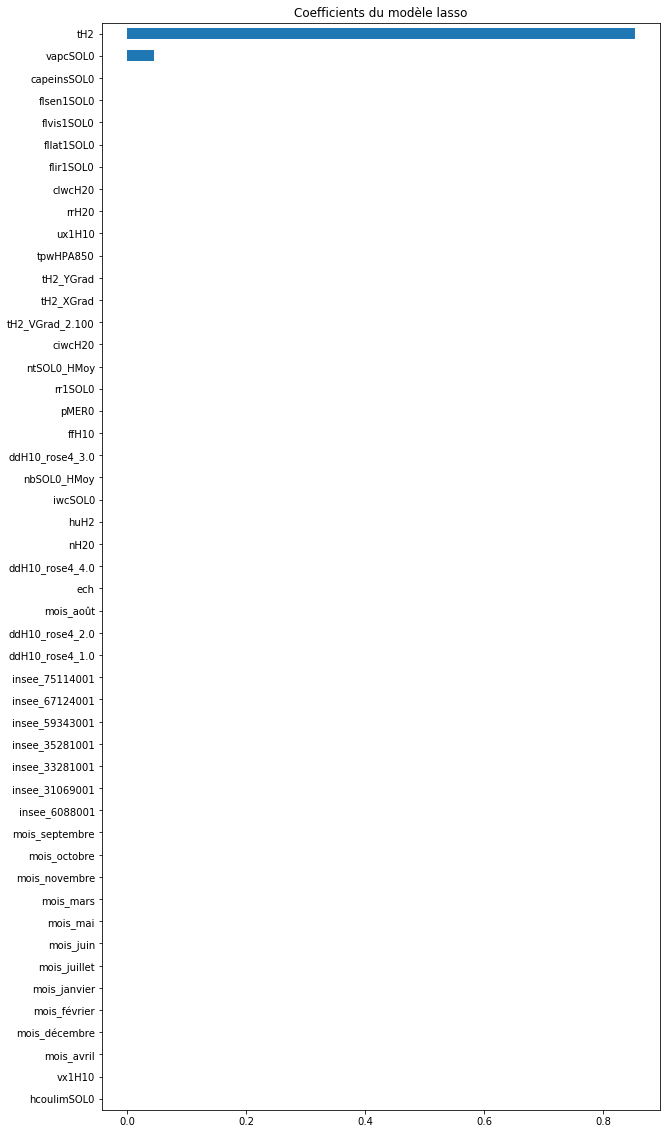

In [86]:
imp_coef = coef.sort_values()
plt.figure(figsize=(10,20))
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title(u"Coefficients du modèle lasso")

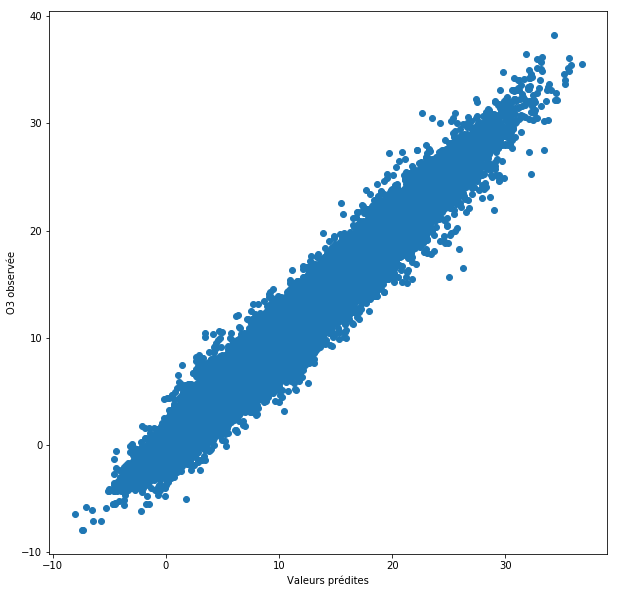

In [99]:
plt.figure(figsize=(10,10))
plt.plot(prev,Y_test,"o")
plt.xlabel(u"Valeurs prédites")
plt.ylabel(u"O3 observée")
plt.show()

Dénombrement des erreurs par matrice de confusion

In [100]:
table=pd.crosstab(prev>10,Y_test>10)
print(round(table/Y_test.shape[0]*100,2))

tH2_obs  False  True 
row_0                
False    36.59   2.41
True      3.84  57.16


## Réseau de neurones

In [14]:
df_clean_c.dtypes

date               datetime64[ns]
insee                    category
tH2_obs                   float64
capeinsSOL0               float64
ciwcH20                   float64
clwcH20                   float64
ddH10_rose4              category
ffH10                     float64
flir1SOL0                 float64
fllat1SOL0                float64
flsen1SOL0                float64
flvis1SOL0                float64
hcoulimSOL0               float64
huH2                      float64
iwcSOL0                   float64
nbSOL0_HMoy               float64
nH20                      float64
ntSOL0_HMoy               float64
pMER0                     float64
rr1SOL0                   float64
rrH20                     float64
tH2                       float64
tH2_VGrad_2.100           float64
tH2_XGrad                 float64
tH2_YGrad                 float64
tpwHPA850                 float64
ux1H10                    float64
vapcSOL0                  float64
vx1H10                    float64
ech           

In [116]:
X_train.shape, X_test.shape

((113926, 43), (48826, 43))

In [15]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler  
# L'algorithme ds réseaux de neurones nécessite éventuellement une normalisation 
# des variables explicatives avec les commandes ci-dessous
scaler = StandardScaler()  
scaler.fit(X_train)  
Xnet_train = scaler.transform(X_train)  
# Meme transformation sur le test
Xnet_test = scaler.transform(X_test)
# Mais cela ne semnble pas nécessaire sur ces données.
# Les commandes sont donc fournies à titre indicatif.

ValueError: could not convert string to float: 'juin'

In [76]:
clf = MLPRegressor(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(15,), random_state=1)
clf.fit(X_train,Y_train)

ValueError: could not convert string to float: 'juin'

In [74]:
param_grid=[{"hidden_layer_sizes":list([(5,),(6,),(7,),(8,)])}]
#nnet= GridSearchCV(MLPClassifier(max_iter=500),param_grid,cv=10,n_jobs=-1)
nnetOpt=nnet.fit(X_train, Y_train)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - nnetOpt.best_score_,nnetOpt.best_params_))

NameError: name 'GridSearchCV' is not defined

In [ ]:
# Estimation de l'erreur de prévision sur le test
1-nnetOpt.score(X_test,Yb_test)

In [ ]:
# prévision de l'échantillon test
y_chap = nnetOpt.predict(X_test)

hosanna